In [2]:
# Read in the raw text
rawData = open("Sentiment Analysis Dataset.csv").read()

# Print the raw data
rawData[0:500]

"\ufeffItemID,Sentiment,SentimentSource,SentimentText\n1,0,Sentiment140,                     is so sad for my APL friend.............\n2,0,Sentiment140,                   I missed the New Moon trailer...\n3,1,Sentiment140,              omg its already 7:30 :O\n4,0,Sentiment140,          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...\n5,0,Sentiment140,         i think mi bf is cheating on me!!!       T_T\n6,0,Sentiment140,         or"

In [3]:
parsedData = rawData.split('\n')

In [4]:
parsedData[0:5]

['\ufeffItemID,Sentiment,SentimentSource,SentimentText',
 '1,0,Sentiment140,                     is so sad for my APL friend.............',
 '2,0,Sentiment140,                   I missed the New Moon trailer...',
 '3,1,Sentiment140,              omg its already 7:30 :O',
 "4,0,Sentiment140,          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)..."]

In [2]:
import pandas as pd
import string
import re
import nltk

pd.set_option('display.max.colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

columns = ['item ID','label','NR','text','na01','na02']
data = pd.read_csv("Sentiment Analysis Dataset.csv", names = columns, skiprows = 1,low_memory=False)
data.pop('na01')
data.pop('na02')
data.pop('item ID')
data.pop('NR')
data.head()

,label,text
0,0,is so sad for my APL friend.............
1,0,I missed the New Moon trailer...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,0,i think mi bf is cheating on me!!! T_T


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
# checking the dimention, distribution of labels, and the missing value
print("input data has {} rows and {} columns".format(len(data), len(data.columns)))
print("out of {} rows, {} are negative, {} are positive".format(len(data),len(data[data['label']==0]),len(data[data['label']==1])))
print("number of null in label:{}".format(data['label'].isnull().sum()))
print("number of null in text:{}".format(data['text'].isnull().sum()))

input data has 1578614 rows and 2 columns
out of 1578614 rows, 788436 are negative, 790178 are positive
number of null in label:0
number of null in text:0


In [3]:
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,text,body_len
0,0,is so sad for my APL friend.............,34
1,0,I missed the New Moon trailer...,27
2,1,omg its already 7:30 :O,19
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...,97
4,0,i think mi bf is cheating on me!!! T_T,30


In [4]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['text'].apply(lambda x: count_punct(x))

data.head()

,label,text,body_len,punct%
0,0,is so sad for my APL friend.............,34,38.2
1,0,I missed the New Moon trailer...,27,11.1
2,1,omg its already 7:30 :O,19,10.5
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...,97,12.4
4,0,i think mi bf is cheating on me!!! T_T,30,13.3


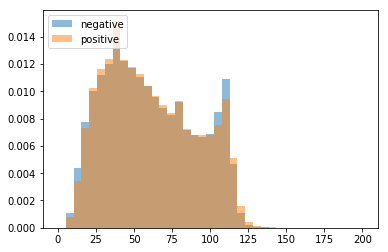

In [12]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']==0]['body_len'], bins, alpha=0.5, normed=True, label='negative')
pyplot.hist(data[data['label']==1]['body_len'], bins, alpha=0.5, normed=True, label='positive')
pyplot.legend(loc='upper left')
pyplot.show()

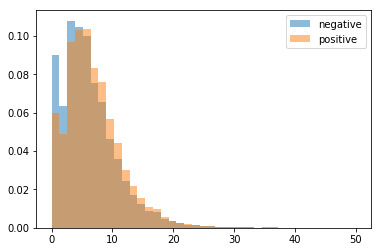

In [15]:

bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']==0]['punct%'], bins, alpha=0.5, normed=True, label='negative')
pyplot.hist(data[data['label']==1]['punct%'], bins, alpha=0.5, normed=True, label='positive')
pyplot.legend(loc='upper right')
pyplot.show()

In [11]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text.strip())
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1578614, 953968)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 104)
['11', '112102', '2', '30mins', '730', 'APL', 'Again', 'CRy', 'Chillin', 'Feeling', 'Funny', 'HUGE', 'I', 'Im', 'Its', 'Ive', 'Juuuuuuuuuuuuuuuuussssst', 'Moon', 'New', 'Now', 'O', 'Omgaga', 'Semisonic', 'Sunny', 'TT', 'TV', 'This', 'Tomorrow', 'Tonight', 'Work', 'already', 'australia', 'awhhe', 'beard', 'bf', 'celebrate', 'cheating', 'completely', 'crown', 'cut', 'day', 'dentist', 'face', 'far', 'feel', 'fine', 'friend', 'get', 'go', 'gonna', 'growing', 'gunna', 'handed', 'happy', 'hater', 'hmmmm', 'httpmylocme27HX', 'im', 'isnt', 'jb', 'listen', 'lt', 'man', 'meantime', 'mi', 'miss', 'missed', 'much', 'must', 'nowSO', 'number', 'ok', 'omg', 'positive', 'put', 'right', 'roll', 'rt', 'sad', 'scary', 'shaunamanu', 'showing', 'since', 'sooo', 'start', 'strangely', 'sucked', 'suposed', 'thanks', 'thats', 'think', 'thunder', 'today', 'trailer', 'twitter', 'uniform', 'useless', 'way', 'weekend', 'well', 'win', 'wonder', 'worry', 'year']


In [12]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.cloumns =tfidf_vect_sample.get_feature_names
X_tfidf_df

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf_df.toarray())], axis=1)
X_features.head()

AttributeError: 'DataFrame' object has no attribute 'toarray'